<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [4]:
# следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0
152,Tanzania,153,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
154,Central African Republic,155,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0


Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [5]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

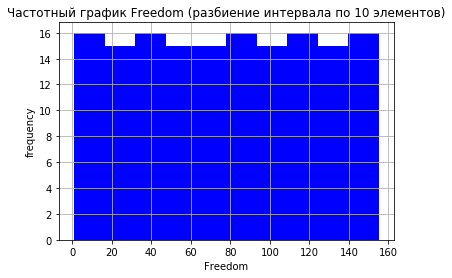

In [10]:
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='b')

plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

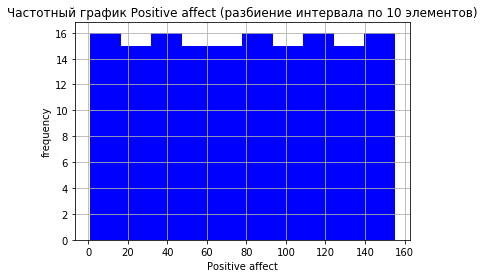

In [13]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='b')

plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Параметры имеют равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [49]:
freedom = df[df['Freedom'] >= 0]['Freedom']
freedom

0        5.0
1        6.0
2        3.0
3        7.0
4       19.0
       ...  
151     21.0
152     78.0
153    155.0
154    133.0
155    154.0
Name: Freedom, Length: 155, dtype: float64

In [81]:
mean = statistics.mean(freedom)

In [51]:
sum(freedom)/len(freedom)

78.0

In [59]:
median = sorted(freedom)[int(len(freedom)/2)]
median


78.0

In [60]:
print('Медиана: ', statistics.median(freedom))

Медиана:  78.0


In [62]:
mode = {}

for i in freedom:
    if i not in mode:
        mode[i] = 1
    else:
        mode[i] +=1 

mode_value = []
for value, key in mode.items():
    mode_value.append(value)
    
for  key, value in mode.items():
    if value == max(list(mode.values())):
        print(key)

In [72]:
print('Значение моды: ', statistics.mode(freedom))

StatisticsError: no unique mode; found 155 equally common values

In [27]:
min(df['Freedom'])

1.0

In [28]:
max(df['Freedom'])

155.0

In [80]:
#размах
max(df['Freedom']) - min(df['Freedom'])

154.0

In [83]:
#стандартное отклонение
sum_f = 0

for i in freedom:
    sum_f += (i - mean)**2
stdev = (sum_f / (len(freedom)-1) )**0.5
stdev

44.88875137492688

In [84]:
statistics.pstdev(freedom)

44.74371464239419

In [86]:
#дисперсия
disp = 1/len(freedom ) * sum_f
disp

2002.0

In [88]:
statistics.pvariance(freedom)

2002.0

In [129]:
id = list(freedom.index[0:])

выбросы

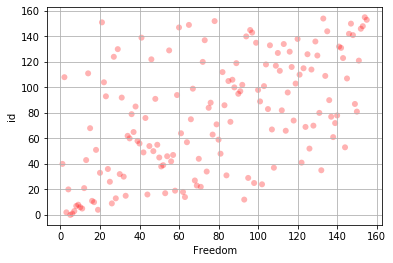

In [130]:

fig, ax = plt.subplots()
ax.scatter(freedom, id, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('id')
plt.show()

выбросов не наблюдается

Почему нельзя найти моду?

In [73]:
# моду нельзя найти, так как все значения в выборке встречаются одинаковое количество раз
freedom.value_counts()

154.0    1
42.0     1
40.0     1
49.0     1
45.0     1
        ..
119.0    1
92.0     1
103.0    1
88.0     1
5.0      1
Name: Freedom, Length: 155, dtype: int64

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [78]:
positive_affect = df[df['Freedom'] >= 0]['Positive affect']

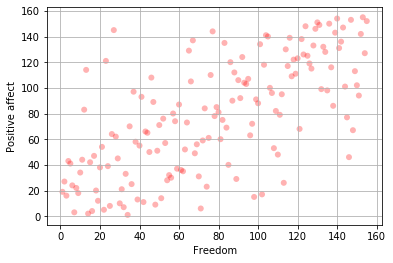

In [75]:

fig, ax = plt.subplots()
ax.scatter(freedom, positive_affect, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.show()

In [79]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(freedom, positive_affect)
print(corr)

0.6817698430601657


Знак коэффициента(+) говорит о том, что данные сонаправлены.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [94]:
freedom1 = freedom - statistics.mean(freedom )
print(min(freedom1), max(freedom1))


-77.0 77.0


In [95]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_norm = min_max_scaler.fit_transform(np.array(freedom1).reshape(-1, 1))
print(min(freedom_norm))
print(max(freedom_norm))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

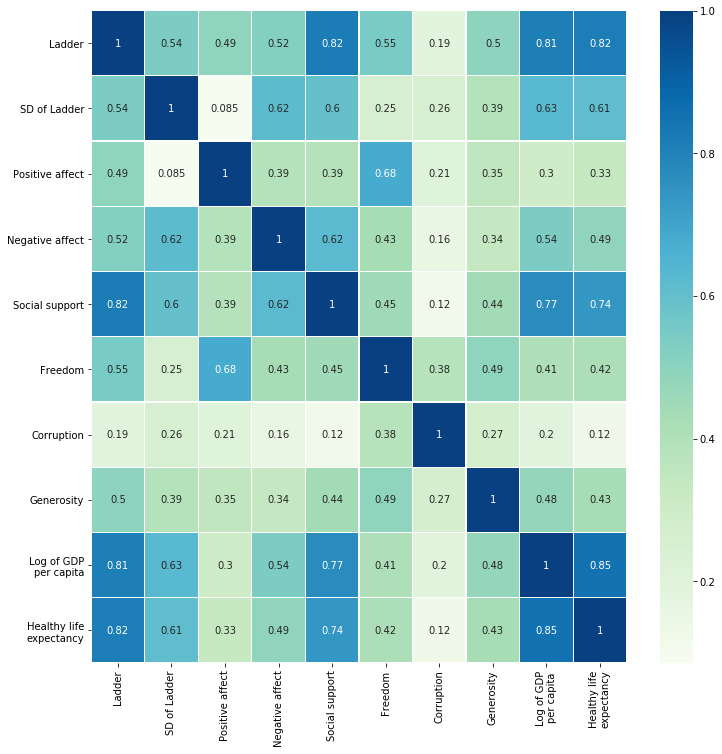

In [97]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='GnBu',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [102]:
df_2 = pd.read_csv('avocado.csv')
df_2[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

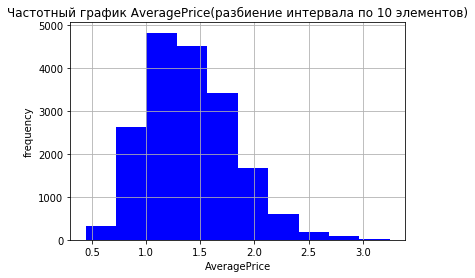

In [104]:
n, bins, patches = plt.hist(df_2['AveragePrice'], 10, facecolor='b')

plt.xlabel('AveragePrice')
plt.ylabel('frequency')
plt.title('Частотный график AveragePrice(разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

График имеет равномерное распределение


Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [107]:
columns_df_2 = df_2[['4046','4225','4770', 'AveragePrice']]

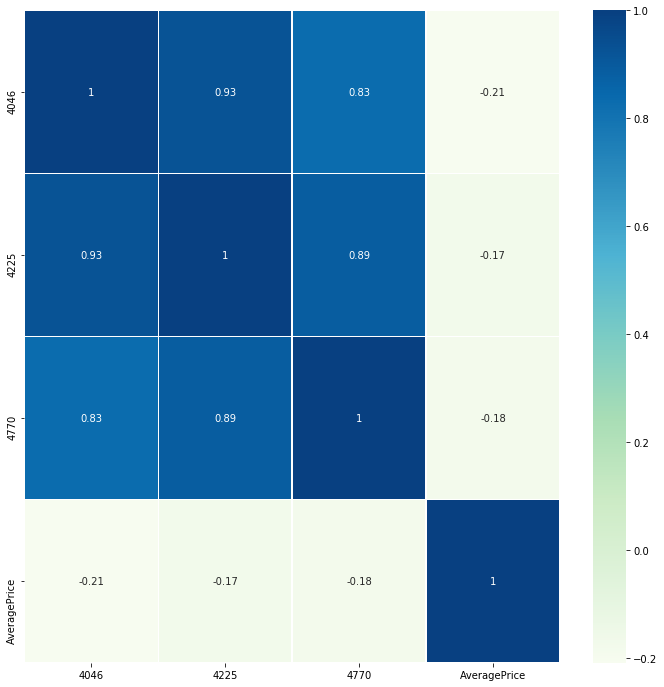

In [108]:
sns.heatmap(columns_df_2.corr(),annot=True,cmap='GnBu',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

На основе матрицы корреляций можно сделать выводы о наличии сонаправленных связей между (в порядке убывания):   
1. 4046 и 4225  
2. 4225 и 4770  
3. 4770 и 4046

Связей же со данными Average Price не обнаруживается

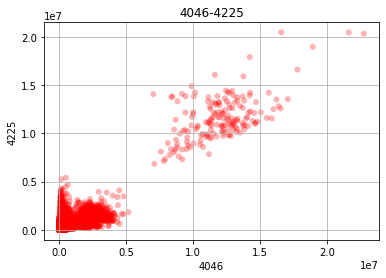

In [115]:
fig, ax = plt.subplots()
ax.scatter(df_2['4046'], df_2['4225'], c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('4046')
plt.ylabel('4225')
plt.title('4046-4225')
plt.show()

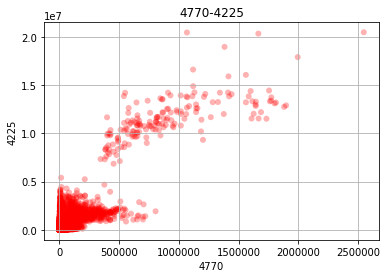

In [116]:
fig, ax = plt.subplots()
ax.scatter(df_2['4770'], df_2['4225'], c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('4770')
plt.ylabel('4225')
plt.title('4770-4225')
plt.show()

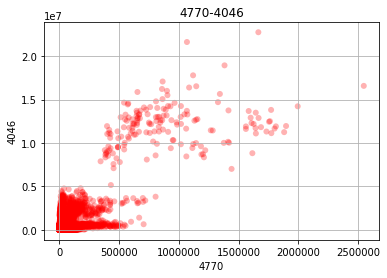

In [117]:
fig, ax = plt.subplots()
ax.scatter(df_2['4770'], df_2['4046'], c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('4770')
plt.ylabel('4046')
plt.title('4770-4046')
plt.show()